In [2]:
import pandas as pd
from sklearn.mixture import GaussianMixture


In [3]:
f_df = pd.read_csv("joy_data_df_f.csv")
m_df = pd.read_csv("joy_data_df_m.csv")
f_df



,Emotion,Video_ID,Gender,energy_trend,f0_trend,energy_dynamism,f0_dynamism,energy_burst_count,energy_burst_rate,energy_mean_burst_magnitude,...,energy_max_peak_prominence,energy_peak_position_mean,energy_peak_position_std,energy_peak_width_mean,mean_attack_rate,mean_decay_rate,attack_decay_ratio,envelope_modulation,attack_count,decay_count
0,joy,dia4_utt1_enhanced.wav,female,-0.041621,-0.800000,0.187279,0.358173,0,0.000000,0.000000,...,0.770479,0.461538,0.000000,0.0,0.058002,0.000000,0.000000,0.213741,2,0
1,joy,dia4_utt8_enhanced.wav,female,0.087883,-0.379507,0.050433,0.049964,6,0.007435,2.097808,...,0.986242,0.513253,0.283036,0.0,0.041151,0.048238,0.853096,0.061954,38,40
2,joy,dia4_utt10_enhanced.wav,female,-0.329277,0.966838,0.035097,0.175716,1,0.006494,3.167485,...,0.997513,0.214286,0.109559,0.0,0.034373,0.049011,0.701322,0.049678,2,2
3,joy,dia11_utt8_enhanced.wav,female,-0.385218,-0.204629,0.049844,0.149197,4,0.022472,2.258409,...,0.999857,0.253745,0.158483,0.0,0.071077,0.067013,1.060639,0.067593,5,7
4,joy,dia11_utt9_enhanced.wav,female,0.106582,0.149889,0.027911,0.069143,5,0.007429,2.914022,...,0.999613,0.653343,0.218516,0.0,0.054635,0.054720,0.998450,0.041084,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,joy,dia1029_utt6_enhanced.wav,female,-0.290193,-0.747553,0.046325,0.115404,3,0.016304,2.230014,...,0.999945,0.454710,0.256294,0.0,0.060094,0.045630,1.316976,0.062726,6,6
837,joy,dia1029_utt7_enhanced.wav,female,0.176437,-0.196220,0.065349,0.115112,3,0.019231,1.922154,...,0.999044,0.620192,0.240913,0.0,0.055729,0.066122,0.842827,0.080853,9,8
838,joy,dia1029_utt14_enhanced.wav,female,0.051275,-0.326936,0.072577,0.183639,3,0.011152,1.972174,...,0.997653,0.553903,0.224961,0.0,0.078351,0.052242,1.499783,0.091003,14,13
839,joy,dia1034_utt1_enhanced.wav,female,-0.394373,-1.034859,0.046598,0.063598,4,0.015326,2.065801,...,0.999905,0.352107,0.224787,0.0,0.060479,0.057078,1.059588,0.063761,7,7


In [4]:
import matplotlib.pyplot as plt
import numpy as np
def plot_gmm_1d(feature, feature_name, K=5, cluster_map=None):
    """
    Plot 1D Gaussian Mixture Model for a given feature
    
    Parameters:
    -----------
    feature : array-like
        The feature values to model
    feature_name : str
        Name of the feature for plot labels
    K : int, default=5
        Number of components in the GMM
    cluster_map : dict, optional
        Mapping of cluster IDs to labels
    """
    # Initialize and fit GMM
    gmm = GaussianMixture(n_components=K, random_state=0)
    gmm.fit(feature.reshape(-1, 1))

    # Prepare a grid of x-values spanning the data range
    x = np.linspace(min(feature), max(feature), 200)
    x_2d = x.reshape(-1, 1)

    # Score samples (log probability density) from the GMM
    logprob = gmm.score_samples(x_2d)
    pdf = np.exp(logprob)  # convert log probability to normal pdf

    # Get the per-component responsibilities for each x-value
    resp = gmm.predict_proba(x_2d)

    # Create figure
    plt.figure(figsize=(10, 6))
    
    # Plot a histogram of the data, normalized to show density
    plt.hist(feature, bins=30, density=True, alpha=0.5, label="Data histogram")

    # Plot the total mixture PDF
    plt.plot(x, pdf, 'k-', label="Mixture PDF")

    # Plot individual components
    for cluster_id in range(K):
        component_pdf = resp[:, cluster_id] * gmm.weights_[cluster_id] * np.exp(gmm.score_samples(x_2d))
        label = f"Component {cluster_id}"
        if cluster_map is not None and cluster_id in cluster_map:
            label = f"Component {cluster_id}: {cluster_map[cluster_id]}"
        plt.plot(x, resp[:, cluster_id] * gmm.weights_[cluster_id] * pdf, label=label)
    
    plt.xlabel(f"{feature_name}")
    plt.ylabel("Density")
    plt.legend()
    plt.title(f"GMM with {K} components - {feature_name}")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    return gmm

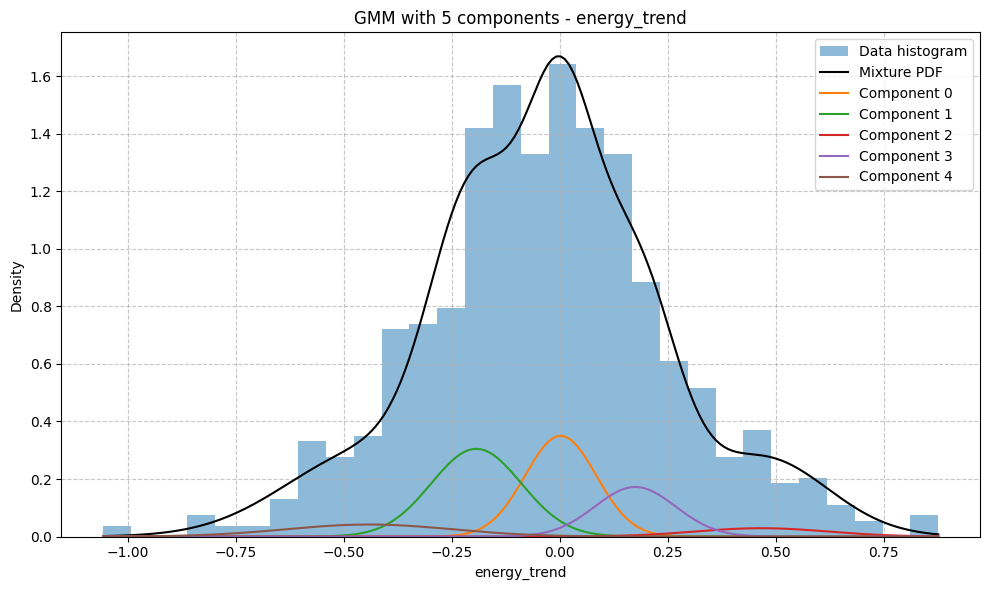

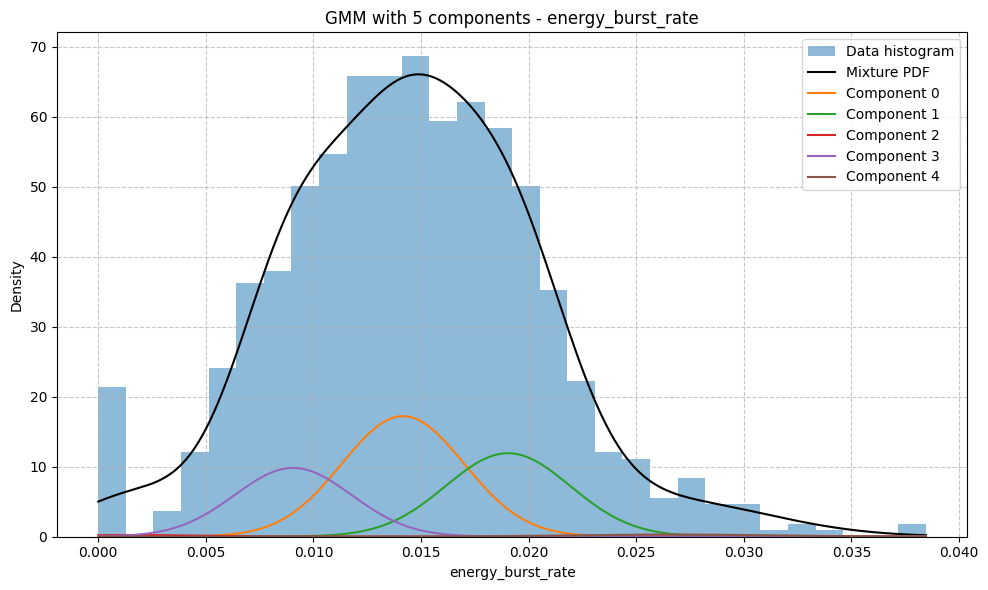

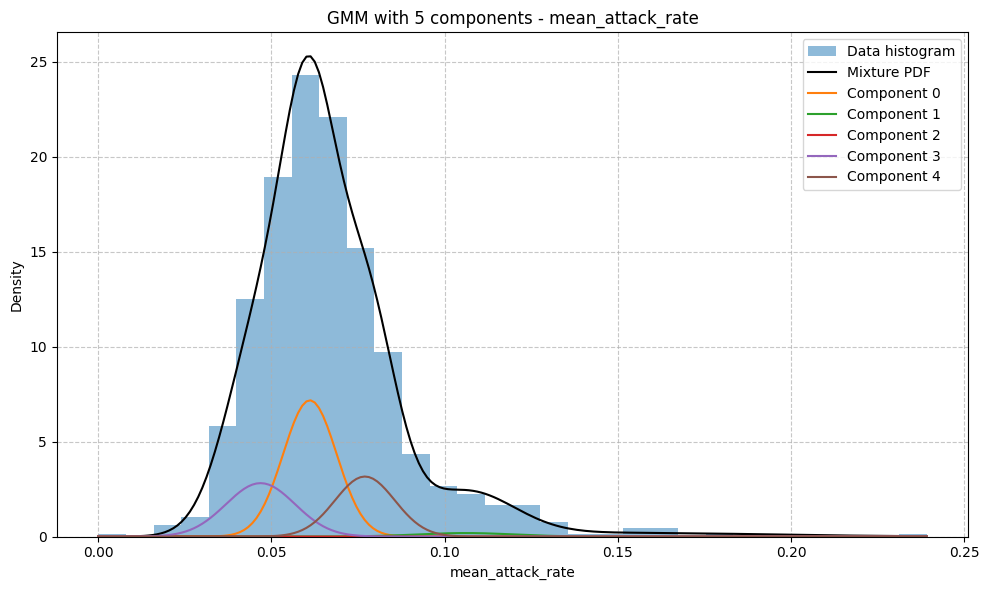

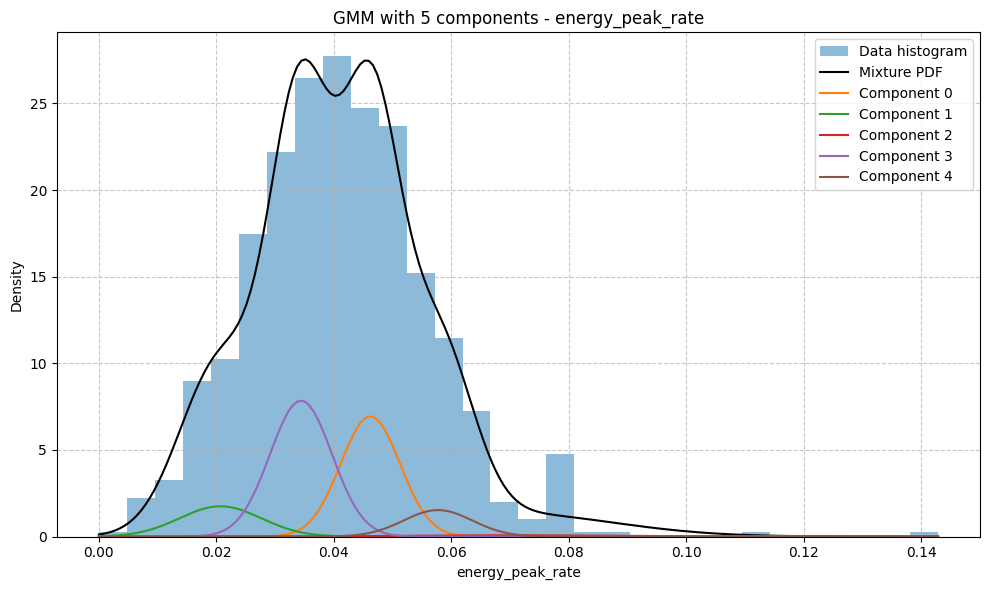

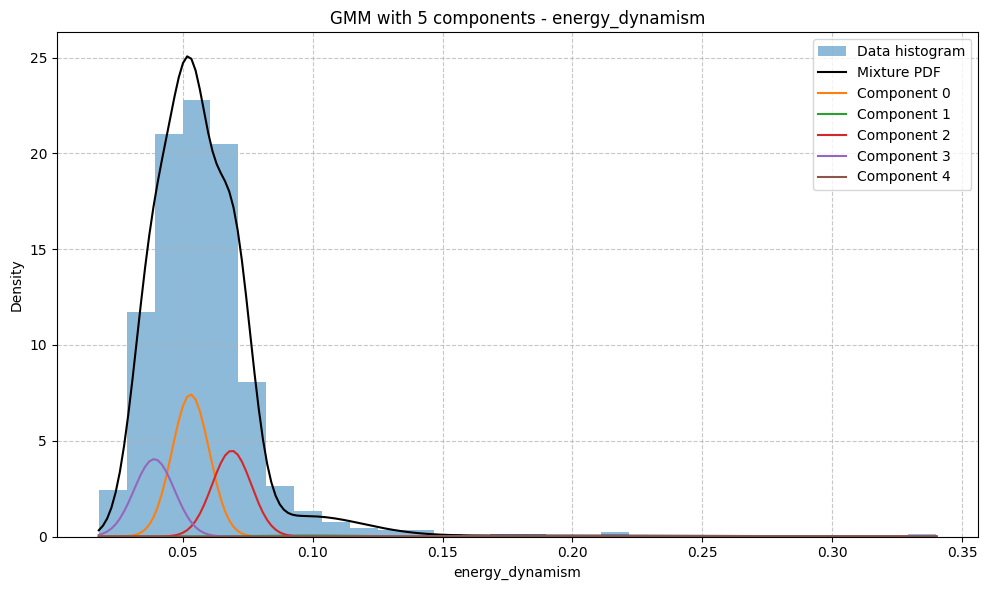

In [ ]:
# feature_map = {
#     'energy_trend',
#     'f0_trend',
#     'energy_dynamism',
#     'f0_dynamism',
#     'energy_burst_count',
#     'energy_burst_rate',
#     'energy_mean_burst_magnitude',
#     'energy_max_burst_magnitude',
#     'energy_burst_coverage',
#     'energy_first_burst_position',
#     'energy_peak_count',
#     'energy_peak_rate',
#     'energy_mean_peak_prominence',
#     'energy_max_peak_prominence',
#     'energy_peak_position_mean',
#     'energy_peak_position_std',
#     'energy_peak_width_mean',
#     'mean_attack_rate',
#     'mean_decay_rate',
#     'attack_decay_ratio',
#     'envelope_modulation',
# }
energy_trend = f_df["energy_trend"].values
energy_burst_rate = f_df["energy_burst_rate"].values
mean_attack_rate = f_df["mean_attack_rate"].values
energy_peak_rate = f_df["energy_peak_rate"].values
energy_dynamism = f_df["energy_dynamism"].values

gmm_energy_trend = plot_gmm_1d(energy_trend, "energy_trend")
gmm_energy_burst_rate = plot_gmm_1d(energy_burst_rate, "energy_burst_rate")
gmm_mean_attack_rate = plot_gmm_1d(mean_attack_rate, "mean_attack_rate")
gmm_energy_peak_rate = plot_gmm_1d(energy_peak_rate, "energy_peak_rate")
gmm_energy_dynamism = plot_gmm_1d(energy_dynamism, "energy_dynamism")


In [11]:
print(energy_trend.mean())
print(energy_burst_rate.mean())
print(mean_attack_rate.mean())
print(energy_peak_rate.mean())
print(energy_dynamism.mean())


-0.03232405108751093
0.014505622760840262
0.06692232510098618
0.04107699016068198
0.057423741488115146


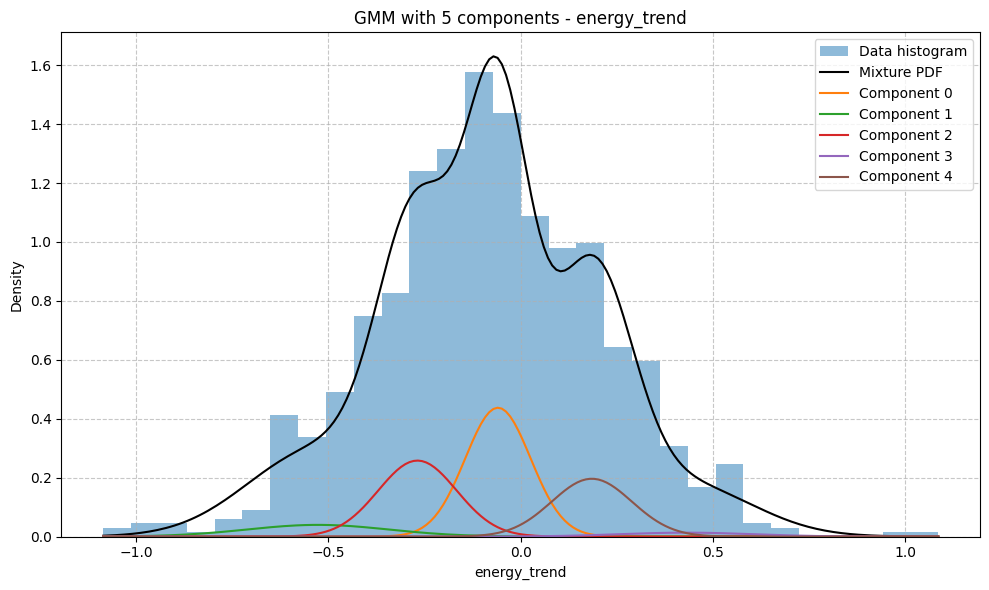

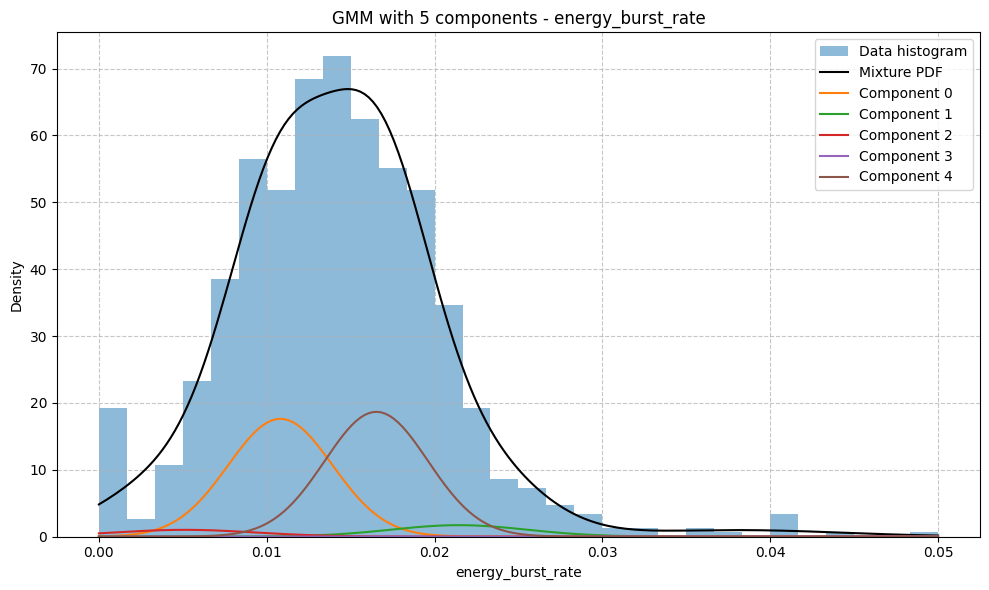

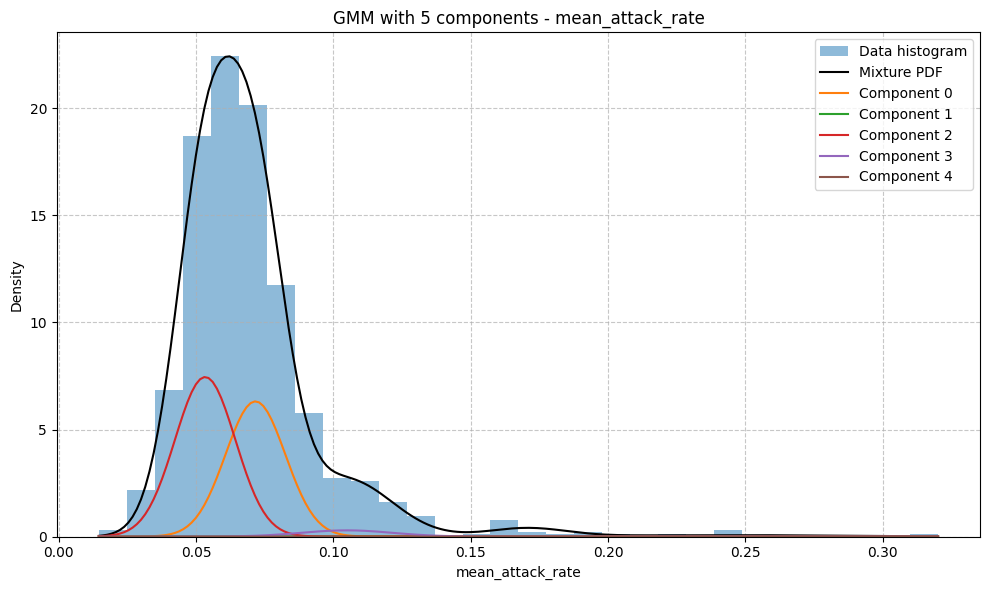

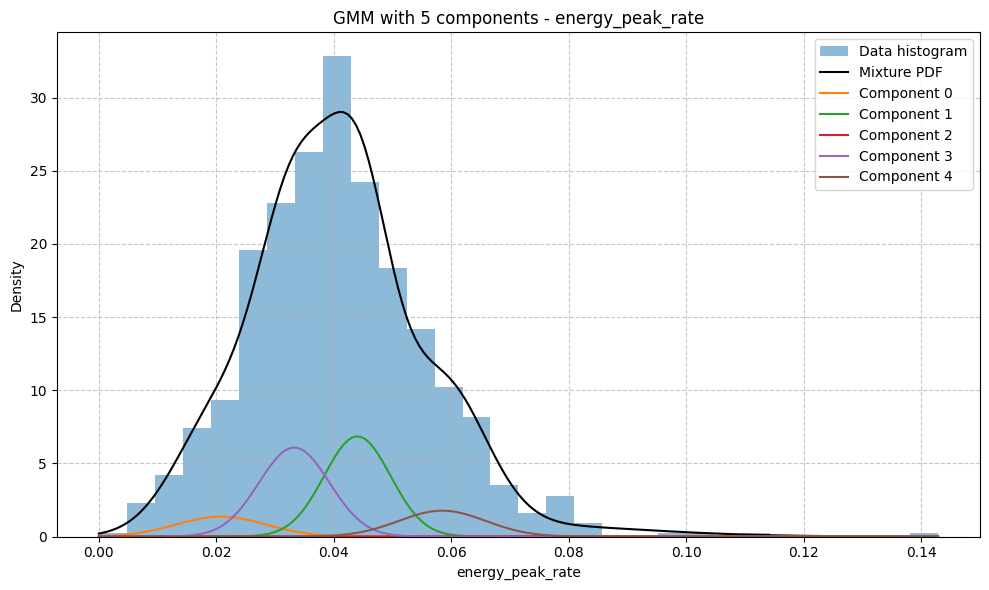

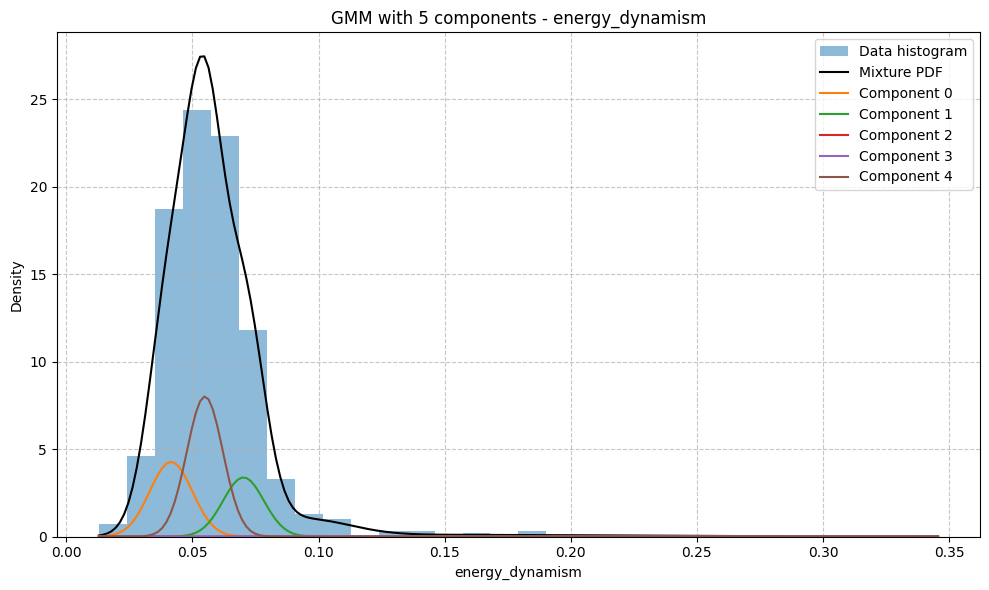

In [12]:
energy_trend = m_df["energy_trend"].values
energy_burst_rate = m_df["energy_burst_rate"].values
mean_attack_rate = m_df["mean_attack_rate"].values
energy_peak_rate = m_df["energy_peak_rate"].values
energy_dynamism = m_df["energy_dynamism"].values

gmm_energy_trend = plot_gmm_1d(energy_trend, "energy_trend")
gmm_energy_burst_rate = plot_gmm_1d(energy_burst_rate, "energy_burst_rate")
gmm_mean_attack_rate = plot_gmm_1d(mean_attack_rate, "mean_attack_rate")
gmm_energy_peak_rate = plot_gmm_1d(energy_peak_rate, "energy_peak_rate")
gmm_energy_dynamism = plot_gmm_1d(energy_dynamism, "energy_dynamism")

In [13]:
print(energy_trend.mean())
print(energy_burst_rate.mean())
print(mean_attack_rate.mean())
print(energy_peak_rate.mean())
print(energy_dynamism.mean())


-0.08362786319019806
0.01420485668391442
0.06958336757528845
0.04074868849516094
0.05823164050853975
